# DataPreprocessing


In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING THE DATASET
dataset=pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [4]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [5]:
df=dataset.drop(['Pregnancies','SkinThickness'],axis=1)

In [6]:
df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,148,72,0,33.6,0.627,50,pos
1,85,66,0,26.6,0.351,31,neg
2,183,64,0,23.3,0.672,32,pos
3,89,66,94,28.1,0.167,21,neg
4,137,40,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,neg
764,122,70,0,36.8,0.340,27,neg
765,121,72,112,26.2,0.245,30,neg
766,126,60,0,30.1,0.349,47,pos


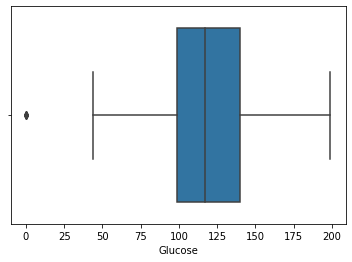

In [7]:
#datavisualization
sns.boxplot(df['Glucose'])

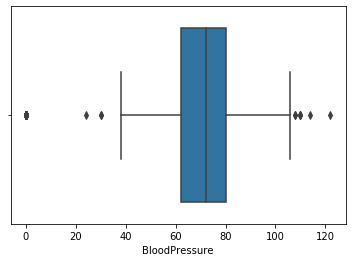

In [8]:
sns.boxplot(df['BloodPressure'])

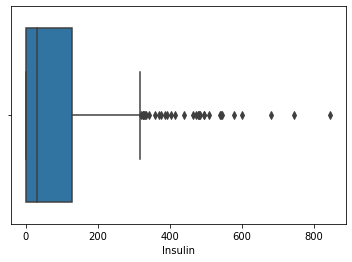

In [9]:
sns.boxplot(df['Insulin'])

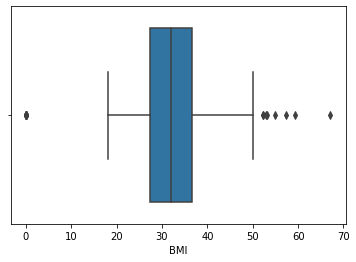

In [10]:
sns.boxplot(df['BMI'])

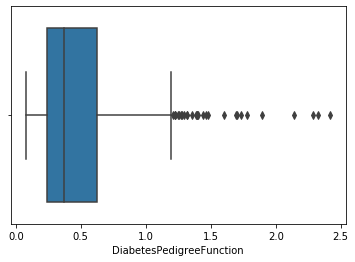

In [11]:
sns.boxplot(df['DiabetesPedigreeFunction'])

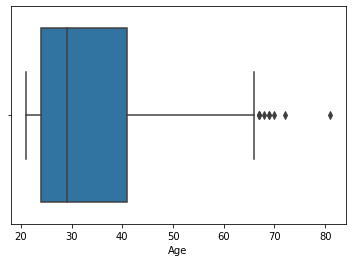

In [12]:
sns.boxplot(df['Age'])

In [13]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['Diabetes']=le.fit_transform(df['Diabetes'])

In [16]:
df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,0
764,122,70,0,36.8,0.340,27,0
765,121,72,112,26.2,0.245,30,0
766,126,60,0,30.1,0.349,47,1


In [17]:
#REMOVING OUTLIERS
from scipy import stats

In [18]:
z=np.abs(stats.zscore(df))

In [19]:
z

array([[0.84832379, 0.14964075, 0.69289057, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [1.12339636, 0.16054575, 0.69289057, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.94372388, 0.26394125, 0.69289057, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.00330087, 0.14964075, 0.27959377, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.1597866 , 0.47073225, 0.69289057, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.8730192 , 0.04624525, 0.69289057, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [20]:
np.where(z>3)

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
         78,  81,  81, 111, 123, 145, 153, 172, 177, 182, 186, 193, 220,
        222, 228, 228, 247, 261, 266, 269, 286, 300, 330, 332, 336, 342,
        347, 349, 357, 370, 370, 371, 371, 395, 409, 415, 426, 426, 430,
        435, 445, 445, 453, 453, 459, 468, 484, 486, 494, 494, 502, 522,
        522, 533, 535, 584, 589, 593, 601, 604, 619, 621, 643, 645, 655,
        666, 673, 684, 684, 695, 697, 703, 706, 706, 753], dtype=int64),
 array([4, 1, 2, 3, 2, 1, 4, 1, 3, 4, 1, 3, 0, 1, 1, 3, 2, 5, 3, 2, 1, 3,
        0, 2, 1, 2, 1, 2, 4, 2, 1, 1, 1, 2, 1, 4, 1, 1, 0, 1, 0, 1, 2, 4,
        3, 4, 4, 2, 2, 1, 3, 1, 1, 3, 4, 1, 5, 5, 1, 1, 2, 1, 3, 0, 1, 3,
        1, 1, 2, 1, 4, 1, 1, 1, 4, 1, 2, 2, 5, 3, 3, 5, 2, 1, 1, 1, 3, 2],
       dtype=int64))

In [21]:
df1=df[(z<3).all(axis=1)]
df1

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
5,116,74,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,0
764,122,70,0,36.8,0.340,27,0
765,121,72,112,26.2,0.245,30,0
766,126,60,0,30.1,0.349,47,1


In [22]:
#SPLITTING DATA INTO TRAIN AND TEST
x=df.iloc[:,:6].values
y=df.iloc[:,-1].values
x

array([[148.   ,  72.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
x_train

array([[ 0.91569367,  0.44912368,  0.3736349 ,  0.37852648,  0.67740401,
         1.69955804],
       [-0.75182191, -0.47230103, -0.69965674, -0.50667229, -0.07049698,
        -0.96569189],
       [ 1.38763205,  1.06340683,  5.09271083,  2.54094063, -0.11855487,
        -0.88240283],
       ...,
       [-0.84620959, -0.21634972, -0.69965674, -0.94927168, -0.95656442,
        -1.04898095],
       [-1.12937261,  0.24436264, -0.69965674, -0.26640405, -0.50001442,
         0.11706589],
       [ 0.47521786,  0.65388473, -0.69965674, -4.07275877,  0.52121586,
         2.94889395]])

In [26]:
import pickle

In [27]:
pickle.dump(sc,open('sc.save','wb'))

# Model Buidiling

In [28]:
#logisticregression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred=lr.predict(x_test)

In [30]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [31]:
#EVALUATION
from sklearn.metrics import roc_curve,auc

In [32]:
fpr,tpr,thresold=roc_curve(y_test,y_pred)

In [33]:
roc_auc=auc(fpr,tpr)

In [34]:
roc_auc

0.7571087691389939

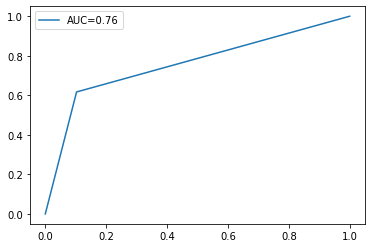

In [35]:
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_pred,y_test)

0.8116883116883117

In [38]:
filename='lr.save'
pickle.dump(lr,open(filename,'wb'))

In [39]:
#neuralnetwork
from keras.models import Sequential 
from keras.layers import Dense 

Using TensorFlow backend.
C:\Users\Chanakya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chanakya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chanakya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chanakya\anaconda3\lib\site-packages\tensorflow\python\framewo

In [40]:
model = Sequential ()

In [41]:
x_test.shape

(154, 6)

In [42]:
model.add(Dense(input_dim=6,init="random_uniform",output_dim=15,activation='relu'))

C:\Users\Chanakya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=6, activation="relu", units=15, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [43]:
model.add(Dense(output_dim=8,init="random_uniform",activation='relu'))

C:\Users\Chanakya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [44]:
model.add(Dense(output_dim=1,activation='sigmoid',init="random_uniform"))

C:\Users\Chanakya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                105       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [47]:
model.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
614/614 [==============================] - 0s 617us/step - loss: 0.6917 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 112us/step - loss: 0.6869 - accuracy: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 143us/step - loss: 0.6755 - accuracy: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 110us/step - loss: 0.6535 - accuracy: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 67us/step - loss: 0.6186 - accuracy: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 113us/step - loss: 0.5811 - accuracy: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 102us/step - loss: 0.5536 - accuracy: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 115us/step - loss: 0.5406 - accuracy: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 106us/step - loss: 0.5347 - accuracy: 0.6401
Epoch 10/100
614/614 [==============================] - 0s 122us/step - l

614/614 [==============================] - 0s 49us/step - loss: 0.4684 - accuracy: 0.7883
Epoch 79/100
614/614 [==============================] - 0s 80us/step - loss: 0.4681 - accuracy: 0.7834
Epoch 80/100
614/614 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.78 - 0s 54us/step - loss: 0.4679 - accuracy: 0.7850
Epoch 81/100
614/614 [==============================] - 0s 41us/step - loss: 0.4671 - accuracy: 0.7850
Epoch 82/100
614/614 [==============================] - 0s 81us/step - loss: 0.4663 - accuracy: 0.7834
Epoch 83/100
614/614 [==============================] - 0s 42us/step - loss: 0.4663 - accuracy: 0.7850
Epoch 84/100
614/614 [==============================] - 0s 67us/step - loss: 0.4659 - accuracy: 0.7850
Epoch 85/100
614/614 [==============================] - 0s 97us/step - loss: 0.4654 - accuracy: 0.7850
Epoch 86/100
614/614 [==============================] - 0s 80us/step - loss: 0.4655 - accuracy: 0.7850
Epoch 87/100
614/614 [======================

In [48]:
y_pred1=model.predict(x_test)

In [49]:
y_pred1

array([[0.671858  ],
       [0.08402526],
       [0.0708243 ],
       [0.671858  ],
       [0.17980617],
       [0.01893848],
       [0.671858  ],
       [0.671858  ],
       [0.41513985],
       [0.46094438],
       [0.67176306],
       [0.671858  ],
       [0.2490142 ],
       [0.16977677],
       [0.2593597 ],
       [0.28099975],
       [0.671858  ],
       [0.00686166],
       [0.29615104],
       [0.24095821],
       [0.671858  ],
       [0.3382119 ],
       [0.23838252],
       [0.24917695],
       [0.01364893],
       [0.36516267],
       [0.02780157],
       [0.671858  ],
       [0.05336472],
       [0.11074638],
       [0.4947803 ],
       [0.15000513],
       [0.10407364],
       [0.6310079 ],
       [0.03994295],
       [0.6706097 ],
       [0.43150854],
       [0.02528825],
       [0.369902  ],
       [0.671858  ],
       [0.3163518 ],
       [0.12154245],
       [0.12135407],
       [0.671858  ],
       [0.671858  ],
       [0.00077617],
       [0.02062678],
       [0.118

In [50]:
y_pred1=(y_pred>0.5)
y_pred1

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,

In [51]:
accuracy_score(y_pred1,y_test)

0.8116883116883117

In [52]:
Fpr,Tpr,Thresold=roc_curve(y_test,y_pred1)

In [53]:
Roc_Auc=auc(fpr,tpr)

In [54]:
Roc_Auc

0.7571087691389939

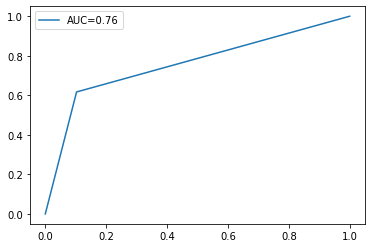

In [55]:
plt.plot(fpr,tpr,label="AUC=%0.2f"%Roc_Auc)
plt.legend()
plt.show()